# Intro to Business Analytics

## Lecture 1 - Pandas, statistics

Today, we'll explore in more depth the possibilities provided by the Python Pandas module. To make things less confusing, we decided to use the same dataset as last week. In fact, you'll start with doing exactly the **same** exercises. Following this, an there are an additionl set of exercises to deal with categorical data.

**This notebook was designed to be done (or, at least, started) at the classroom. It's possible that mid-way or so, you'll feel comfortable to complete it by yourself, but we designed it such that we will be around most of the time. **

So, let's start. Since we are going to work with Pandas, let's just import it, shall we (you'll eventually also need Numpy, so import that too)?

In [1]:
import pandas as pd
import numpy as np

We need some data. Please open the file "pickups_zone_1_15min.csv". This corresponds to the series of taxi-pickups in New York zone 1 (an area in the Manhattan island). 

You can use the method read_csv(file), which **returns** a DataFrame:

> df=pd.read_csv(file)

df is a variable that now has a Pandas DataFrame


In [2]:
df=pd.read_csv("pickups_zone_1_15min.csv")

Good, so we just loaded the file, now let's look at its content (and keep remembering how more complicated it was in Numpy). 

In [3]:
df.head()

,date,hour,minute,pickups
0,2009-01-01,0,0,0
1,2009-01-01,0,15,166
2,2009-01-01,0,30,215
3,2009-01-01,0,45,223
4,2009-01-01,1,0,245


Just to be sure, let's check how many lines the file actually has (now it should be 262848, one line less than with Numpy, why?). 

In [4]:
len(df)

262848

Print the first 10 lines of this file.

In [5]:
df[:10]

,date,hour,minute,pickups
0,2009-01-01,0,0,0
1,2009-01-01,0,15,166
2,2009-01-01,0,30,215
3,2009-01-01,0,45,223
4,2009-01-01,1,0,245
5,2009-01-01,1,15,182
6,2009-01-01,1,30,181
7,2009-01-01,1,45,190
8,2009-01-01,2,0,197
9,2009-01-01,2,15,212


Oh, remember that we need to make a single field with the datetime (instead of 3 separate ones...)!

Pandas actually allows us to simplify that right when we load the file. So, let's do it again, but now take a look at the following Stackexchange thread: https://stackoverflow.com/questions/38509512/pandas-read-csv-with-date-in-2-columns

How about applying this here?



In [10]:
df = pd.read_csv("pickups_zone_1_15min.csv", sep=',', parse_dates={'dt': [0, 1, 2]})
df.head()

,dt,pickups
0,2009-01-01 0 0,0
1,2009-01-01 0 15,166
2,2009-01-01 0 30,215
3,2009-01-01 0 45,223
4,2009-01-01 1 0,245


In [7]:
df.dtypes

dt         object
pickups     int64
dtype: object

It may happen that the (new) temporal field is still a string and not a datetime object. Can you correct that?

In [8]:
df['dt']=pd.to_datetime(df['dt'], format='%Y-%m-%d %H %M')

Another possibility is to use the datetime library and the function apply.

In [11]:
import datetime

df['datetime']=df['dt'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H %M"))
del df['dt']
df.head()

,pickups,datetime
0,0,2009-01-01 00:00:00
1,166,2009-01-01 00:15:00
2,215,2009-01-01 00:30:00
3,223,2009-01-01 00:45:00
4,245,2009-01-01 01:00:00


In fact, it can be useful to assign the time as index for our dataframe. Let's do that with the method set_index() of the DataFrame object. Notice that it doesn't do "in-place" changes, in other words, this command would not work: 
> df.set_index(KEY)

You'd have to do

>df=df.set_index(KEY)

In [12]:
df=df.set_index('datetime')
df.head()

,pickups
datetime,
2009-01-01 00:00:00,0
2009-01-01 00:15:00,166
2009-01-01 00:30:00,215
2009-01-01 00:45:00,223
2009-01-01 01:00:00,245


Important note: You can always get a vector with the indeces themselves with 
> df.index

To understand this, just try it yourself

In [13]:
df.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 00:15:00',
               '2009-01-01 00:30:00', '2009-01-01 00:45:00',
               '2009-01-01 01:00:00', '2009-01-01 01:15:00',
               '2009-01-01 01:30:00', '2009-01-01 01:45:00',
               '2009-01-01 02:00:00', '2009-01-01 02:15:00',
               ...
               '2016-06-30 21:30:00', '2016-06-30 21:45:00',
               '2016-06-30 22:00:00', '2016-06-30 22:15:00',
               '2016-06-30 22:30:00', '2016-06-30 22:45:00',
               '2016-06-30 23:00:00', '2016-06-30 23:15:00',
               '2016-06-30 23:30:00', '2016-06-30 23:45:00'],
              dtype='datetime64[ns]', name='datetime', length=262848, freq=None)

So, just for fun (and to compare with the amount of work we did with Numpy), let's get **only** the pickups part. 

In [14]:
df['pickups'][:10]

datetime
2009-01-01 00:00:00      0
2009-01-01 00:15:00    166
2009-01-01 00:30:00    215
2009-01-01 00:45:00    223
2009-01-01 01:00:00    245
2009-01-01 01:15:00    182
2009-01-01 01:30:00    181
2009-01-01 01:45:00    190
2009-01-01 02:00:00    197
2009-01-01 02:15:00    212
Name: pickups, dtype: int64

Trivial, isn't it? It's even indexed correctly! :-)

Now, it's time for our histogram for the pickups. If you can't remember or don't know how it's done, feel free to search online (something like "Pandas histogram")

again, don't forget to add

>import matplotlib.pyplot as plt
>
>%matplotlib inline



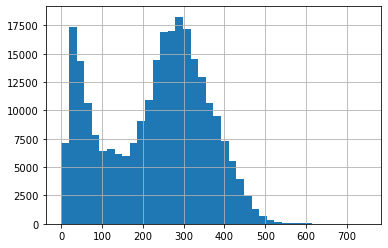

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

df['pickups'].hist(bins=40);

It's even scary how easy it is, right?

What about the scatter plot? It won't be as direct, you will have to use the pyplot one (the one you used last time)

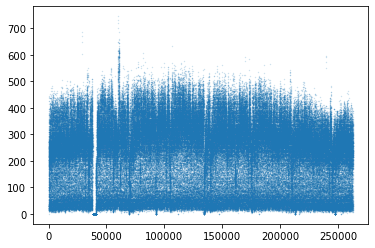

In [16]:
plt.scatter(range(len(df['pickups'])), df['pickups'], s=0.1, alpha=0.3);

Now let's do that version with the colors. As last time, you need to create a new vector with the minutes since midnight.

In [17]:
vminute_of_day=np.array([d.hour*60+d.minute for d in df.index])
vminute_of_day[:10]

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135])

Even though it may sound redundant, it may be useful to add this new series to the DataFrame (as a new column, in practice).

In [18]:
df['minute_of_day']=vminute_of_day


So, let's do the graph with the colors. 

Remember, imagine that the number of minutes since midnight (that you just created) corresponds to a color. The function scatter allows you to give this list straight away and plot it (just use the argument c, for example "c=my_minute_since_midnight_list". 

Do you want to try?

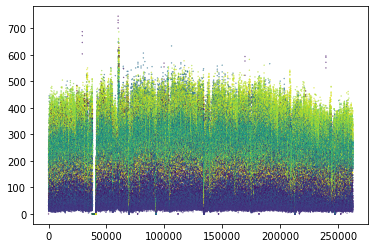

In [19]:
plt.scatter(range(len(df['pickups'])), df['pickups'], s=0.1, c=vminute_of_day);

Now, for the 24-hr average plot, where the x axis is 0 to 1440 (1440=24 hours X 60 minutes), and you show the average per minute.

(don't forget to add the 5 and 95 quantiles) 


A small tip (mean of 15 minutes of the day):

> df.loc[df['minute_of_day']==15].mean()
>
>
Output:

pickups          205.344047

minute_of_day     15.000000

dtype: float64


**IMPORTANT:** notice that the output above is not just the mean of the _pickups_ (which is what we want). It also returns the mean of the minute_of\_day itself (which is obviously 15!)... This may confuse things later on, so how do you get the mean of pickups only?



In [18]:
df.loc[df['minute_of_day']==15]['pickups'].mean()

205.34404674945216

Now, use this to do the 24-hr average plot

In [20]:
TIME_RESOLUTION=15
day_ts=np.arange(0,1440, TIME_RESOLUTION)

average_line=[df.loc[df['minute_of_day']==tt]['pickups'].mean() for tt in day_ts]
q5_line=[df.loc[df['minute_of_day']==tt]['pickups'].quantile(.05)  for tt in day_ts]
q95_line=[df.loc[df['minute_of_day']==tt]['pickups'].quantile(.95) for tt in day_ts]

# Another possibility is to use the groupby method

average_line2 = df.groupby('minute_of_day')['pickups'].mean()
q5_line2=df.groupby('minute_of_day')['pickups'].quantile(0.05)
q95_line2=df.groupby('minute_of_day')['pickups'].quantile(0.95)

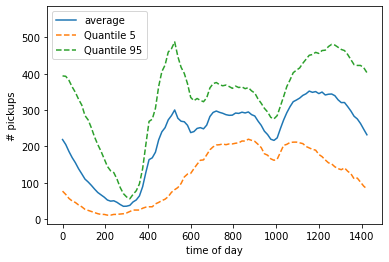

In [21]:
plt.plot(day_ts,average_line, label="average")
plt.plot(day_ts,q5_line, "--", label="Quantile 5")
plt.plot(day_ts,q95_line, "--", label="Quantile 95")
plt.ylim(top=np.max(q95_line)*1.2)
plt.legend()
plt.xlabel("time of day")
plt.ylabel("# pickups")
plt.show()

Ok, again, you did a lot of stuff. Why not reorganize it again?

For example, a new function that receives the file name, and generates all the graphs you did so far.

Wouldn't it be cool to just generate those by a single command?

In [22]:
def show_area_stats(fscv, time_resolution=TIME_RESOLUTION):
    df = pd.read_csv("pickups_zone_1_15min.csv", sep=',', parse_dates={'dt': [0, 1, 2]})
    df['datetime']=df['dt'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H %M"))
    del df['dt']
    df=df.set_index('datetime')
    
    fig=plt.figure(figsize=(15, 15))
    ax1=fig.add_subplot(221)
    df['pickups'].hist(bins=40)
    
    plt.ylabel("frequency")
    plt.xlabel(" pickups")

    ax2=fig.add_subplot(222)
    ax2.scatter(range(len(df['pickups'])), df['pickups'], s=0.1, alpha=0.3)
    plt.ylabel("# pickups")
    plt.xlabel("trip ID")
    
    ax3=fig.add_subplot(223)
    vminute_of_day=np.array([d.hour*60+d.minute for d in df.index])
    df['minute_of_day']=vminute_of_day
    ax3.scatter(range(len(df['pickups'])), df['pickups'], s=0.1, c=vminute_of_day)
    plt.ylabel("# pickups")
    plt.xlabel("trip ID")

    ax4=fig.add_subplot(224)
    day_ts=np.arange(0,1440, TIME_RESOLUTION)

    average_line=[df.loc[df['minute_of_day']==tt]['pickups'].mean() for tt in day_ts]
    q5_line=[df.loc[df['minute_of_day']==tt]['pickups'].quantile(.05)  for tt in day_ts]
    q95_line=[df.loc[df['minute_of_day']==tt]['pickups'].quantile(.95) for tt in day_ts]
    ax4.plot(day_ts,average_line, label="average")
    ax4.plot(day_ts,q5_line, "--", label="Quantile 5")
    ax4.plot(day_ts,q95_line, "--", label="Quantile 95")
    plt.ylim(ymax=max(q95_line)*1.2)
    plt.legend()
    plt.xlabel("time of day")
    plt.ylabel("# pickups")
    plt.show()
    

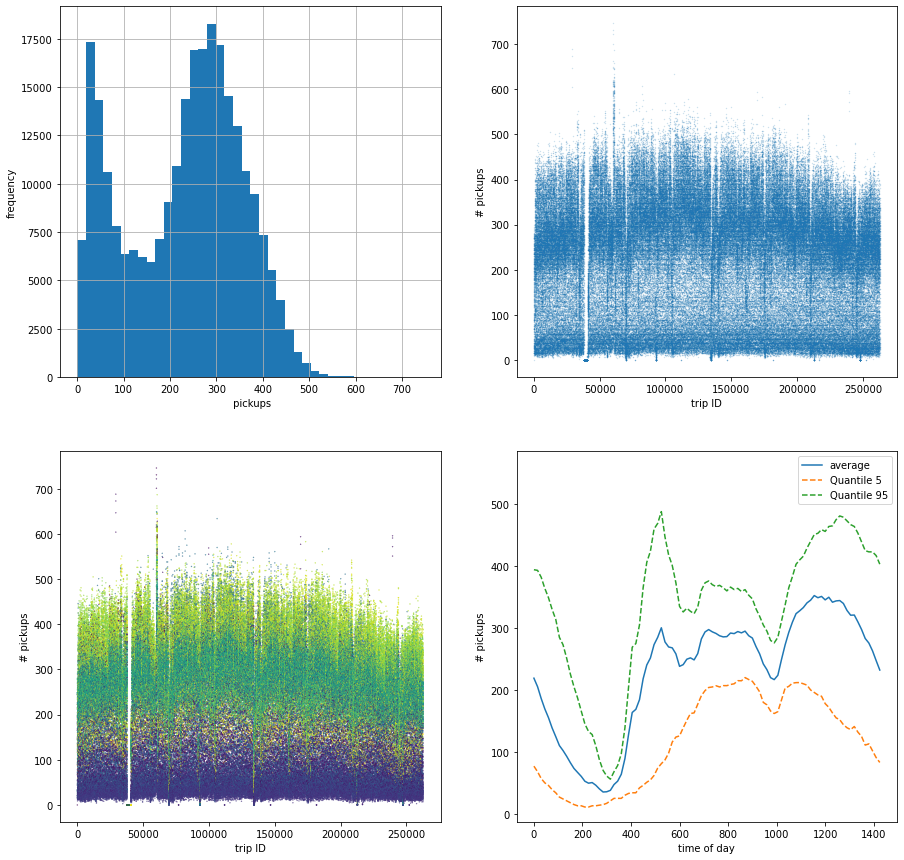

In [23]:
show_area_stats("pickups_zone_1_15min.csv")

### Correlations

One very important task in Data Science modeling is to find (and understand) correlations between different variables. Let's do a few simple exercises.

Let's start with a simple question: are the different areas correlated between them? If yes, it may be interesting knowledge. For example, maybe we can share data between them to predict better, later.


Tip: Try to make a single DataFrame with ALL time series (s1, s17, s21, s28). 


In [25]:
def my_read_csv(file):
    df = pd.read_csv(file, sep=',', parse_dates={'dt': [0, 1, 2]})
    df['datetime']=df['dt'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H %M"))
    del df['dt']
    return df.set_index('datetime')
    

In [27]:
s1=my_read_csv("pickups_zone_1_15min.csv")
s17=my_read_csv("pickups_zone_17_15min.csv")
s21=my_read_csv("pickups_zone_21_15min.csv")
s28=my_read_csv("pickups_zone_28_15min.csv")

smerge=s1.join(s17, rsuffix="17")
smerge=smerge.join(s21, rsuffix="21")
smerge=smerge.join(s28, rsuffix="28")
smerge['pickups1']=smerge['pickups']
del smerge['pickups']
smerge.head()

,pickups17,pickups21,pickups28,pickups1
datetime,,,,
2009-01-01 00:00:00,339,175,21,0
2009-01-01 00:15:00,285,394,29,166
2009-01-01 00:30:00,214,297,10,215
2009-01-01 00:45:00,202,322,9,223
2009-01-01 01:00:00,198,344,4,245


In [28]:
smerge.corr()

,pickups17,pickups21,pickups28,pickups1
pickups17,1.000000,0.826310,0.660062,0.881971
pickups21,0.826310,1.000000,0.674388,0.879230
pickups28,0.660062,0.674388,1.000000,0.636816
pickups1,0.881971,0.879230,0.636816,1.000000


It seems all but area 28 are well correlated with each other. 

Now, a more interesting question: are there correlations between a given area, and the other areas in earlier time steps? 

This is a VERY important one. If you find high correlation, for example, between area 1 at time t, with area 17 at time t-1, then you can use area 17 to predict area 1!

To check this, you need to play a little bit with the vectors. Let's call a vector that is shifted in time for 1 time step, a "lag1" vector. 

The process is similar to Numpy's, but there's a few tweaks. To make things simpler, we copy a solution from Stackoverflow:

In [29]:
def buildLaggedFeatures(s,columns, lag=2,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [30]:
smerged_lagged_s1=buildLaggedFeatures(smerge, ['pickups1', 'pickups17', 'pickups21', 'pickups28'])

Let's now check those correlations

In [31]:
smerged_lagged_s1.corr()

,pickups17,pickups21,pickups28,pickups1,pickups1_lag1,pickups1_lag2,pickups17_lag1,pickups17_lag2,pickups21_lag1,pickups21_lag2,pickups28_lag1,pickups28_lag2
pickups17,1.000000,0.826312,0.660061,0.881973,0.894897,0.897279,0.982116,0.958838,0.852892,0.870269,0.670167,0.675169
pickups21,0.826312,1.000000,0.674390,0.879232,0.860141,0.831943,0.790979,0.747011,0.975829,0.951748,0.658548,0.637625
pickups28,0.660061,0.674390,1.000000,0.636814,0.643488,0.644030,0.646421,0.628015,0.685994,0.693090,0.920108,0.867725
pickups1,0.881973,0.879232,0.636814,1.000000,0.976706,0.954186,0.856308,0.822122,0.886399,0.883951,0.626386,0.612619
pickups1_lag1,0.894897,0.860141,0.643488,0.976706,1.000000,0.976703,0.881973,0.856308,0.879232,0.886400,0.636815,0.626387
pickups1_lag2,0.897279,0.831943,0.644030,0.954186,0.976703,1.000000,0.894895,0.881971,0.860135,0.879233,0.643489,0.636816
pickups17_lag1,0.982116,0.790979,0.646421,0.856308,0.881973,0.894895,1.000000,0.982116,0.826312,0.852894,0.660062,0.670168
pickups17_lag2,0.958838,0.747011,0.628015,0.822122,0.856308,0.881971,0.982116,1.000000,0.790981,0.826314,0.646421,0.660062
pickups21_lag1,0.852892,0.975829,0.685994,0.886399,0.879232,0.860135,0.826312,0.790981,1.000000,0.975826,0.674389,0.658548
pickups21_lag2,0.870269,0.951748,0.693090,0.883951,0.886400,0.879233,0.852894,0.826314,0.975826,1.000000,0.685997,0.674392


WOW! Very interesting!! This means that you can use data from these other areas to predict for area 1... This is useful when there is missing data in area 1, for example... 

Now, let's get to the autocorrelogram. Well, in Pandas, this is trivial!

You can use the auto_corr method:

>s1=df['pickups'] #s1 is now a Series
>
>print(s1.autocorr(1))  #gives the autocorrelation of lag 1

Output:

0.97670270955196936


Cool, now you just need to get values for the different lags (1, 2, 3, 4...) and plot the values!

In [32]:
s1=df['pickups']
autocors=[s1.autocorr(lag) for lag in range(1, 120)]

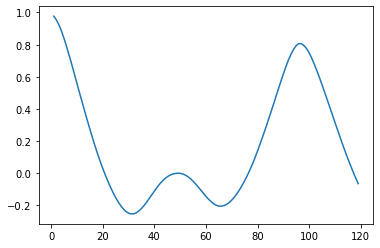

In [33]:
plt.plot(range(1,120), autocors)
plt.show()

### Categorical variables, combining datasets

Ok, you're almost ready to start rockin' with actual Data Science learning (next week: Regression models :-) ). 

There's a last thing before that. Quite often, the data that you get is not in numerical form. Two obvious examples are time partitioning, like weekdays ("Monday", "Tuesday"...) or time of day ("Morning rush hour", "lunch time"). These are in fact words, how can we use them in our modeling, if in practice it always requires numerical quantities?

Particularly with mobility data, the examples above are quite common. For example, the time of day (rush hour VS low demand times) can be crucial for prediction!


Let's start by creating a new column in our dataframe with the day of week (we'll do it for you):

In [34]:
smerge['weekday']=[el.weekday() for el in smerge.index]     #for each element in the index use the "weekday" function 
                                                  #(remember that the index is the datetime series)

To make sure that it worked just take a look at the resulting DataFrame

In [35]:
smerge.head()

,pickups17,pickups21,pickups28,pickups1,weekday
datetime,,,,,
2009-01-01 00:00:00,339,175,21,0,3
2009-01-01 00:15:00,285,394,29,166,3
2009-01-01 00:30:00,214,297,10,215,3
2009-01-01 00:45:00,202,322,9,223,3
2009-01-01 01:00:00,198,344,4,245,3


Wow, these are already numbers, but wait!... Do those quantities mean actually _something_ or aren't they just individual symbols for the week days?

Other ways to respond to this question: if instead of these numbers you used others (e.g. starting at 1 instead of 0?) wouldn't the result be the same? If you use algebra on it, does the result make sense (Thursday-Tuesday=Wednesday...). 

The bottom line is that, in general, you shouldn't use these numbers directly in a regression model because week days do not correspond to quantities. This is a **categorical** variable, which can have one of a finite set of values. In our case:

_weekday_ $\in $ {Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday}

So, let's convert those values into something useful. A first obvious thing to do is to get whether a day is a week day or weekend. Let's define a simple function for it:

In [38]:
def is_weekend(weekday):
    return weekday in [5,6]


You can test it...

Another nice thing will be to actually put names there. Here's another function

In [39]:

def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"

Now, let's create the new columns in our DataFrame!

In [40]:
smerge['is_weekend']=[is_weekend(el) for el in smerge['weekday']]
smerge['wd']=[weekday_word(el.weekday()) for el in smerge.index]

Take a look at the new DataFrame. Seems more useful, right? 

In [41]:
del smerge['weekday']
smerge.head()

,pickups17,pickups21,pickups28,pickups1,is_weekend,wd
datetime,,,,,,
2009-01-01 00:00:00,339,175,21,0,False,Thursday
2009-01-01 00:15:00,285,394,29,166,False,Thursday
2009-01-01 00:30:00,214,297,10,215,False,Thursday
2009-01-01 00:45:00,202,322,9,223,False,Thursday
2009-01-01 01:00:00,198,344,4,245,False,Thursday


Let's get the "time of day" information. Again, we provide you with the corresponding function. 

In [45]:
def time_of_day(hour):
    if hour<7:
        return "night"
    elif hour<9:
        return "morning rush"
    elif hour<12:
        return "morning"
    elif hour<14:
        return "lunch time"
    elif hour<17:
        return "afternoon"
    elif hour<20:
        return "afternoon rush"
    elif hour<23:
        return "evening"
    else:
        return "night"
    
#In fact, we created another function that has the SAME functionality as above just to show you how compact and elegant 
# Python can be. 
# Don't worry, you're not expected to reach this level before of a lot of experience. 
def time_of_day2(hour):    
    h_thresholds=[7,8,12,14,17,20,23]
    h_names=["night", "morning rush", "morning", "lunch time", "afternoon", "afternoon rush", "evening", "night"]
    return h_names[next(x[0] for x in enumerate(h_thresholds) if x[1] >=hour)]



Can you create the new column with time of day?

In [46]:
smerge['time_of_day']=[time_of_day(el.hour) for el in smerge.index]

In [47]:
smerge.head()

,pickups17,pickups21,pickups28,pickups1,is_weekend,wd,time_of_day
datetime,,,,,,,
2009-01-01 00:00:00,339,175,21,0,False,Thursday,night
2009-01-01 00:15:00,285,394,29,166,False,Thursday,night
2009-01-01 00:30:00,214,297,10,215,False,Thursday,night
2009-01-01 00:45:00,202,322,9,223,False,Thursday,night
2009-01-01 01:00:00,198,344,4,245,False,Thursday,night


The other **very important** technique is to transform categorical variables into "dummy variables". A dummy variable is typically binary (so it's either 1/0, or True/False), and corresponds to one single possible categorical value. 

**So, you transform a single variable with N different values **

_time of day -> {night, morning rush, morning...evening}_

**into N dummy variables, each one with 2 values (1 or 0):**

_night -> {0, 1}_

_morning rush -> {0, 1}_

_..._

_evening -> {0, 1}_


Yes, we know it sounds like hard work, but in Pandas, it's all done trivially:

In [48]:
sm_dummies=pd.get_dummies(smerge, columns=['time_of_day'])  #this creates dummies for the "time_of_day" variable. 

Finally, a well deserved reward for you. Just run the method describe() in your DataFrame and enjoy!... 

>s.describe()
>

Output:

_something useful_  :-)


Think about how many lines you would have needed in Numpy! 

In [49]:
sm_dummies.describe()

,pickups17,pickups21,pickups28,pickups1,time_of_day_afternoon,time_of_day_afternoon rush,time_of_day_evening,time_of_day_lunch time,time_of_day_morning,time_of_day_morning rush,time_of_day_night
count,262848.000000,262848.000000,262848.000000,262848.000000,262848.00000,262848.00000,262848.00000,262848.000000,262848.00000,262848.000000,262848.000000
mean,470.741345,325.792991,95.496762,228.875369,0.12500,0.12500,0.12500,0.083333,0.12500,0.083333,0.333333
std,258.447889,191.075710,74.489080,125.148303,0.33072,0.33072,0.33072,0.276386,0.33072,0.276386,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,250.000000,133.000000,8.000000,118.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000
50%,496.000000,376.000000,101.000000,251.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000
75%,651.000000,473.000000,156.000000,322.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,1.000000
max,1378.000000,1032.000000,361.000000,746.000000,1.00000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000


In [50]:
sm_dummies.head().T

datetime,2009-01-01 00:00:00,2009-01-01 00:15:00,2009-01-01 00:30:00,2009-01-01 00:45:00,2009-01-01 01:00:00
pickups17,339,285,214,202,198
pickups21,175,394,297,322,344
pickups28,21,29,10,9,4
pickups1,0,166,215,223,245
is_weekend,False,False,False,False,False
wd,Thursday,Thursday,Thursday,Thursday,Thursday
time_of_day_afternoon,0,0,0,0,0
time_of_day_afternoon rush,0,0,0,0,0
time_of_day_evening,0,0,0,0,0
time_of_day_lunch time,0,0,0,0,0


In [43]:
sm_dummies.to_csv("output.csv")